<a href="https://colab.research.google.com/github/bichdnle/PythonProjects/blob/main/Data%20Wrangling%20%26%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataFrame**

**Load the datasets**

In [ ]:
import pandas as pd

payment_report = pd.read_csv("payment_report.csv")
product = pd.read_csv("product.csv")
transactions = pd.read_csv("transactions.csv")

# **EDA**

**Merge datasets**

In [ ]:
payment_enriched = payment_report.merge(product, on='product_id', how='left')
payment_enriched

,report_month,payment_group,product_id,source_id,volume,category,team_own
0,2023-01,payment,12,45,624110375,PXXXXXT,ASD
1,2023-01,payment,17,45,335715113,PXXXXXB,ASD
2,2023-01,payment,18,45,737784466,PXXXXXB,ASD
3,2023-01,payment,19,45,120963069,PXXXXXM2,ASD
4,2023-01,payment,20,45,319653158,PXXXXXB,ASD
...,...,...,...,...,...,...,...
914,2023-04,payment,15067,45,1504000,PXXXXXR,ASL
915,2023-04,refund,1976,37,3542271587,NaN,NaN
916,2023-04,refund,1976,38,13831708189,NaN,NaN
917,2023-04,refund,1976,39,1905435543,NaN,NaN


**Check missing values, incorrect data types, duplicates, outliers**



In [ ]:
payment_enriched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   report_month   919 non-null    object
 1   payment_group  919 non-null    object
 2   product_id     919 non-null    int64 
 3   source_id      919 non-null    int64 
 4   volume         919 non-null    int64 
 5   category       897 non-null    object
 6   team_own       897 non-null    object
dtypes: int64(3), object(4)
memory usage: 50.4+ KB


In [ ]:
# Convert data types
payment_enriched['report_month'] = pd.to_datetime(payment_enriched['report_month'])
payment_enriched[['payment_group', 'category', 'team_own']] = payment_enriched[['payment_group', 'category', 'team_own']].astype(str)

In [ ]:
payment_enriched.describe()

,report_month,product_id,source_id,volume
count,919,919.000000,919.000000,9.190000e+02
mean,2023-02-19 06:05:05.549510400,1192.517954,44.875952,1.978574e+08
min,2023-01-01 00:00:00,3.000000,37.000000,5.500000e+03
25%,2023-02-01 00:00:00,640.000000,45.000000,1.250000e+06
50%,2023-03-01 00:00:00,1059.000000,45.000000,7.982015e+06
75%,2023-04-01 00:00:00,1585.000000,45.000000,5.447599e+07
max,2023-04-01 00:00:00,15067.000000,45.000000,1.383171e+10
std,NaN,1293.463329,0.910995,8.367595e+08


In [ ]:
payment_enriched.isnull().sum()
payment_enriched.dropna(subset=['category', 'team_own'], inplace=True)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124139 entries, 0 to 124138
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  124139 non-null  int64  
 1   merchant_id     124139 non-null  int64  
 2   volume          124139 non-null  int64  
 3   transType       124139 non-null  int64  
 4   transStatus     124139 non-null  int64  
 5   sender_id       119710 non-null  float64
 6   receiver_id     109002 non-null  float64
 7   extra_info      477 non-null     object 
 8   timeStamp       124139 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.5+ MB


In [ ]:
transactions.describe()

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,timeStamp
count,1.241390e+05,124139.000000,1.241390e+05,124139.000000,124139.000000,1.197100e+05,1.090020e+05,1.241390e+05
mean,3.003266e+09,2445.657851,2.316651e+05,6.928910,-12.797195,1.048688e+08,2.095312e+08,1.682949e+12
std,3.185418e+07,3365.442992,9.187843e+05,7.314312,57.805016,6.267305e+08,9.355215e+08,1.026307e+07
min,3.000000e+09,5.000000,1.000000e+00,2.000000,-1333.000000,1.000001e+07,0.000000e+00,1.682932e+12
25%,3.002842e+09,745.000000,1.000000e+04,2.000000,1.000000,1.006161e+07,1.617158e+05,1.682941e+12
50%,3.003320e+09,2250.000000,3.000000e+04,2.000000,1.000000,1.149739e+07,7.035910e+06,1.682949e+12
75%,3.003843e+09,2270.000000,1.000000e+05,8.000000,1.000000,2.102113e+07,3.152906e+07,1.682957e+12
max,6.000066e+09,162525.000000,5.000000e+07,30.000000,1.000000,6.993029e+09,6.999363e+09,1.682972e+12


In [ ]:
transactions.isnull().sum()

transaction_id         0
merchant_id            0
volume                 0
transType              0
transStatus            0
sender_id           4429
receiver_id        15137
extra_info        123662
timeStamp              0
dtype: int64

In [ ]:
transactions.dropna(subset=['sender_id', 'receiver_id', 'extra_info', 'timeStamp'])

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp
75,3002697816,2250,10000,8,1,143579086.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1682932076359
121,3002692713,2250,10000,8,1,38568628.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1682932088284
318,3002681418,2250,10000,8,1,38543687.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1682932142734
336,3002669631,2250,10000,8,1,38566269.0,35067326.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869317201...",1682932150732
829,3002724624,2250,10000,8,1,17333942.0,38543687.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45869357992...",1682932292499
...,...,...,...,...,...,...,...,...,...
116326,3000306840,2250,100000,8,1,21022470.0,7333942.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45860530045...",1682966069734
116450,3000301545,2250,100000,8,1,10015309.0,7333942.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45860541753...",1682966140102
116451,3000301548,2250,100000,8,1,21022470.0,7333942.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""45860541753...",1682966141294
117037,3000314349,2250,2000,8,1,10000994.0,28111314.0,"{\orderInfo\"":{\\\""bill_id\\\"":\\\""44521911414...",1682966485460


In [ ]:
# Return unique values
payment_enriched.nunique()

# Check duplicates
payment_enriched.duplicated('product_id')

0      False
1      False
2      False
3      False
4      False
       ...  
914     True
915     True
916     True
917     True
918     True
Length: 919, dtype: bool

In [ ]:
transactions.nunique()
transactions.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
124134    False
124135    False
124136    False
124137    False
124138    False
Length: 124139, dtype: bool

**Explore relationships across numerical, categorical, and DateTime data**

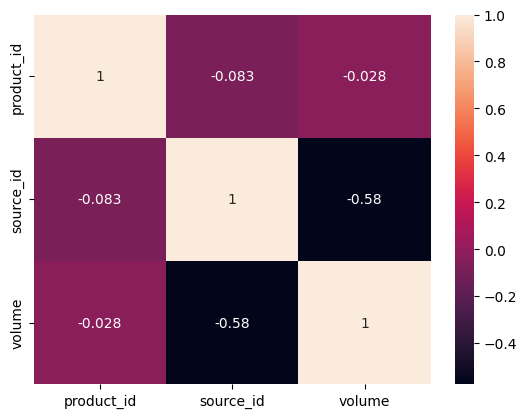

In [ ]:
# payment_enriched
import seaborn as sns

numeric_columns = payment_enriched.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_columns.corr(), annot=True)

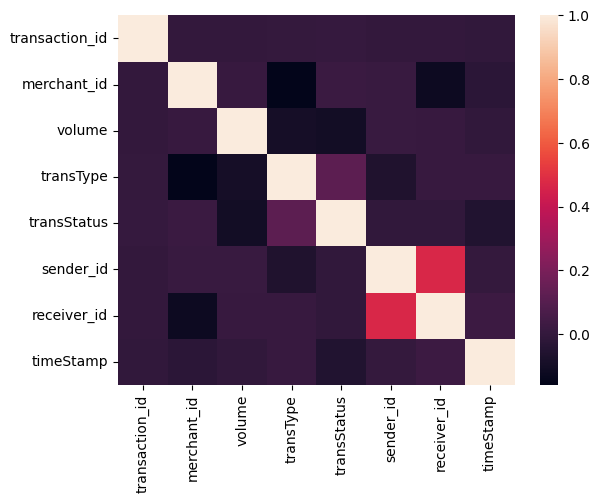

In [ ]:
# transactions
import seaborn as sns

numeric_columns = transactions.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_columns.corr())

# **Data Wrangling**

**Top monthly products and categories**

In [ ]:
# Monthly volume for each product
monthly_volume_by_product = payment_enriched.groupby(['report_month', 'product_id'])['volume'].sum().reset_index()

# Top 3 product_ids with highest volume
top_products = monthly_volume_by_product.groupby('product_id')['volume'].sum().nlargest(3).reset_index()

# Monthly volume for top 3
top_product_list = top_products['product_id'].tolist()
top_monthly_product = monthly_volume_by_product[monthly_volume_by_product['product_id'].isin(top_product_list)]
top_monthly_product

,report_month,product_id,volume
28,2023-01-01,372,2343126103
33,2023-01-01,429,2979095959
185,2023-01-01,1976,4927732679
222,2023-02-01,372,2622628097
227,2023-02-01,429,4058380300
398,2023-02-01,1976,12903703915
435,2023-03-01,372,3821853548
440,2023-03-01,429,3289070346
616,2023-03-01,1976,21006809663
665,2023-04-01,372,4926050767


In [ ]:
# Monthly volume for each category
monthly_volume_by_category = payment_enriched.groupby(['report_month', 'category'])['volume'].sum().reset_index()

# Top 5 categories with highest volume
top_categories = monthly_volume_by_category.groupby('category')['volume'].sum().nlargest(5).reset_index()

# Monthly volume for top 5
top_categories_list = top_categories['category'].tolist()
top_monthly_category = monthly_volume_by_category[monthly_volume_by_category['category'].isin(top_categories_list)]
top_monthly_category

,report_month,category,volume
0,2023-01-01,PXXXXXB,12914884522
2,2023-01-01,PXXXXXD1,539111077
8,2023-01-01,PXXXXXR,1480271374
10,2023-01-01,PXXXXXT,2528165796
14,2023-01-01,nan,4927738179
15,2023-02-01,PXXXXXB,14464836002
17,2023-02-01,PXXXXXD1,1127939732
23,2023-02-01,PXXXXXR,2809537276
25,2023-02-01,PXXXXXT,2734976097
29,2023-02-01,nan,12903817965


**Abnormal products**

In [ ]:
# Products own by teams
product_by_team = payment_enriched.groupby('product_id')['team_own'].nunique().reset_index()

# Find abnormal products
abnormal_products = product_by_team[product_by_team['team_own'] > 1]
abnormal_products

,product_id,team_own


**Lowest performance**

In [ ]:
# Filter data since Q2.2023
data_Q2_2023 = payment_enriched[payment_enriched['report_month'] > '2023-03']

# Team and category with the lowest performance
team_performance = data_Q2_2023.groupby(['team_own', 'category'])['volume'].sum().nsmallest(1).reset_index()
team_performance

,team_own,category,volume
0,ASD,PXXXXXP,300000


**Refund transactions**

In [ ]:
# Filter refund transactions
refund_transactions = payment_enriched[payment_enriched['payment_group'] == 'refund']

# Highest volumes of refund transactions by source IDs
refund_source_id = refund_transactions.groupby('source_id')['volume'].sum().nlargest(1).reset_index()
refund_source_id

,source_id,volume
0,38,36527454759


**Define type of transactions**

In [ ]:
# Classify the transaction type
def classify_transaction(row):
    if row['transType'] == 2:
      if row['merchant_id'] == 1205:
        return 'Bank Transfer Transaction'
      elif row['merchant_id'] == 2260:
        return 'Withdraw Money Transaction'
      elif row['merchant_id'] == 2270:
        return 'Top Up Money Transaction'
      else:
        return 'Payment Transaction'
    elif row['transType'] == 8:
      if row['merchant_id'] == 2250:
        return 'Transfer Money Transaction'
      else:
        return 'Split Bill Transaction'
    else:
      return 'Invalid Transactions'

# Apply the function to each row
transactions['transaction_type'] = transactions.apply(classify_transaction, axis=1)
transactions

,transaction_id,merchant_id,volume,transType,transStatus,sender_id,receiver_id,extra_info,timeStamp,transaction_type
0,3002692434,5,100000,24,1,10199794.0,199794.0,NaN,1682932054455,Invalid Transactions
1,3002692437,305,20000,2,1,14022211.0,14022211.0,NaN,1682932054912,Payment Transaction
2,3001960110,7255,48605,22,1,NaN,10530940.0,NaN,1682932055000,Invalid Transactions
3,3002680710,2270,1500000,2,1,10059206.0,59206.0,NaN,1682932055622,Top Up Money Transaction
4,3002680713,2275,90000,2,1,10004711.0,4711.0,NaN,1682932056197,Payment Transaction
...,...,...,...,...,...,...,...,...,...,...
124134,3000417336,2270,100000,2,1,14021798.0,14021798.0,NaN,1682972289865,Top Up Money Transaction
124135,3000417339,2275,10000,2,-217,35112007.0,35112007.0,NaN,1682972289929,Payment Transaction
124136,3000405330,2250,20000,8,1,38544429.0,38510654.0,NaN,1682972291386,Transfer Money Transaction
124137,3000417342,2270,20000,2,-217,28062496.0,28062496.0,NaN,1682972291938,Top Up Money Transaction


**The numbers of each transaction, volume, senders and receivers.**

In [ ]:
transactions.groupby('transaction_type').agg({'transaction_id':'size', 'volume':'sum', 'sender_id':'nunique', 'receiver_id':'nunique'})

,transaction_id,volume,sender_id,receiver_id
transaction_type,,,,
Bank Transfer Transaction,3803,5170793187,3217,1329
Invalid Transactions,19669,1927295823,352,15559
Payment Transaction,35148,5893984088,26645,18055
Split Bill Transaction,113,487119,111,79
Top Up Money Transaction,27886,10231315465,21458,21458
Transfer Money Transaction,34386,3737494305,9363,6358
Withdraw Money Transaction,3134,1797310064,2990,2990
